In [1]:
import os
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt
import collections
from pprint import pprint
import json
import seaborn as sns

In [2]:
df = pd.read_csv('./csv/mae_data.csv', encoding='utf8')

In [3]:
df.head(10)

,string_field_0,string_field_3,string_field_5,string_field_7,string_field_9,string_field_11
0,And Then You're Dead: What Really Happens If Y...,"Review\n""As someone who is averse to flying, e...",picket_fence,book_jacket,sweatshirt,bannister
1,‎F45ST D125-40,45° screw clamped face mills carrying SEK/MT 1...,picket_fence,book_jacket,sweatshirt,bannister
2,Panasonic DMR-EX99V DVD Recorder,Panasonic DMR-EX99V DVD Recorder\nThe Panasoni...,studio_couch,folding_chair,printer,rocking_chair
3,Sonic Boom: Fire and Ice,"Race through this epic new adventure as Sonic,...",studio_couch,gown,doormat,Egyptian_cat
4,"Quartet Magnetic Dry-Erase/Cork Board, 18 x 30...",Durable board delivers quality performance whe...,studio_couch,crib,wardrobe,web_site
5,Grant Canoe Penny,They say jet-setting Europeans were the first ...,studio_couch,wardrobe,chest,crib
6,Duclemosa 2016 Autumn and Winter Women Long Sl...,Item specifics\nBrand Name: DUCLEMOSA\nMateria...,studio_couch,wardrobe,web_site,shower_curtain
7,Insulated Lunch Bag: Insignia Mall Adult Lunch...,"Popularity - 232 Views, Super high amount of v...",reflex_camera,Polaroid_camera,lens_cap,projector
8,Minka-Lavery Harrison Black Three-Light Outdoo...,Minka-Lavery Harrison Black Three-Light Outdoo...,reflex_camera,Polaroid_camera,washer,loudspeaker
9,9/32 in. I.D. Stainless Steel Bevel Washer for...,Feeney CableRail standard cable assemblies are...,soap_dispenser,lotion,water_bottle,web_site


# IMAGE AI 라벨과 데이터 단어 매칭

In [21]:
title_arr = []
text_arr = []
label_arr = []

pbar = tqdm(total=len(df))
for idx, row in df.iterrows():
    pbar.update(1)
    
    title = row['string_field_0'].lower()
    text = row['string_field_3'].lower()
    
    labels = [row['string_field_5'], row['string_field_7'], 
              row['string_field_9'], row['string_field_11']]
    
    for l in labels:
        if l in title or l in text:
            title_arr.append(title)
            text_arr.append(text)
            label_arr.append(l)

In [4]:
label_df = pd.DataFrame({'title': title_arr, 'text': text_arr, 'label': label_arr})
label_df.head()

,label,text,title
0,screen,"holbrook is a timeless, classic design fused w...","700285385167 - oakley holbrook sunglasses, mat..."
1,screen,features\ndigital cinema 4k for your professio...,"lg 31mu97-b 31"" 4k ips led monitor 17:9 2xhdmi..."
2,fountain,designers fountain ellington mediterranean pat...,designers fountain ellington mediterranean pat...
3,radio,display\ntype\nips-lcd\nresolution\n1280 x 720...,vivo y31
4,hook,"composition: 45% polyester, 33% viscose, 22% c...",casual pants


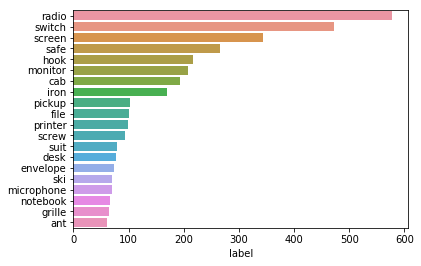

In [5]:
labels = label_df['label'].value_counts()[:20]

sns.barplot(x=labels, y=labels.index, orient='h')
plt.show()

In [26]:
label_df.to_csv('label word result.csv')

# DeepFashion 단어와 데이터 단어 매칭

In [6]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [7]:
lm = WordNetLemmatizer()

In [8]:
fashion_label = ['Anorak','Capris','Caftan','Blazer','Chinos','Cape','Blouse',
 'Culottes', 'Coat', 'Bomber', 'Cutoffs', 'Coverup', 'Button-Down', 'Gauchos',
 'Dress', 'Cardigan', 'Jeans', 'Jumpsuit', 'Flannel', 'Jeggings', 'Kaftan', 'Halter',
 'Jodhpurs', 'Kimono', 'Henley', 'Joggers', 'Nightdress', 'Hoodie', 'Leggings', 'Onesie',
 'Jacket', 'Sarong', 'Robe', 'Jersey', 'Shorts', 'Romper', 'Parka', 'Skirt', 'Shirtdress',
 'Peacoat', 'Sweatpants', 'Sundress', 'Poncho', 'Sweatshorts', 'Sweater', 'Trunks',
 'Tank', 'Tee', 'Top', 'Turtleneck']
fashion_label = [x.lower() for x in fashion_label]

In [22]:
title_arr = []
text_arr = []
label_arr = []

pbar = tqdm(total=len(df))
for idx, row in df.iterrows():
    pbar.update(1)
    
    title = [lm.lemmatize(x) for x in word_tokenize(row['string_field_0'].lower())]
    text = [lm.lemmatize(x) for x in word_tokenize(row['string_field_3'].lower())]
        
    for l in fashion_label:
        
        if l in title or l in text:
            title_arr.append(title)
            text_arr.append(text)
            label_arr.append(l)

In [10]:
fashion_df = pd.DataFrame({'title': title_arr, 'text': text_arr, 'label': label_arr})
fashion_df.head()

,label,text,title
0,top,"[seller, :, avitarunlimited, (, 12,633, ), 99....","[(, 8, ), new, amp, 2004-7941-00, sma, bulkhea..."
1,jersey,"[brand, :, majestic, team, :, chicago, white, ...","[60, %, off, majestic, authentic, ,, size, 60,..."
2,top,"[improve, the, overall, appearance, of, your, ...","[mr., clean, original, magic, eraser, disposab..."
3,top,"[jose, ramirez, 1a, traditional, the, 1a, trad...","[jose, ramirez, 1a, traditional]"
4,jersey,"[vendeur, :, mymemory-uk, (, 365.131, ), 99.6,...","[new, sandisk, 128gb, ultra, micro, sd, sdxc, ..."


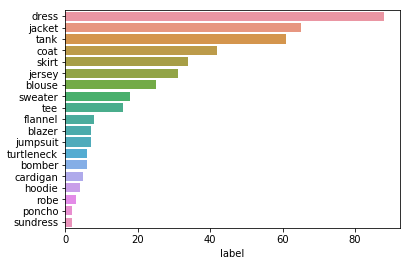

In [11]:
labels = fashion_df['label'].value_counts()[1:20]

sns.barplot(x=labels, y=labels.index, orient='h')
plt.show()

In [19]:
fashion_df.to_csv('fashion label result.csv')

# mae doc2vec

In [14]:
import gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.callbacks import CallbackAny2Vec
import time
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
model = Doc2Vec.load('../gensim_model/apnews_dbow/doc2vec.bin')
vocab = list(model.wv.vocab.keys())

In [17]:
labels = fashion_df['label']
titles = fashion_df['title']
texts = fashion_df['text']

In [18]:
fashion_dict = dict()

for l in fashion_label:
    fashion_dict[l] = []

In [23]:
pbar = tqdm(total=len(labels))
for label, title, text in zip(labels, titles, texts):
    pbar.update(1)
    if not label in vocab or label == 'top':
        continue
        
    tt = title
    tt = list(filter(lambda x: x in vocab, tt))
    
    tv = model.infer_vector(tt)
    label_vec = model.infer_vector([label])
    sim = cosine_similarity([tv], [label_vec])
    
    fashion_dict[label].append(sim[0][0])

In [20]:
for k, v in fashion_dict.items():
    try:
        print(k, sum(v) / len(v))
    except:
        pass

hoodie 0.600971132516861
turtleneck 0.6020228266716003
cape 0.3410552144050598
tee 0.5665780935022566
caftan 0.6474571228027344
poncho 0.7193359732627869
jumpsuit 0.6967390179634094
skirt 0.659773762524128
bomber 0.8722270925839742
jacket 0.6026744663715362
romper 0.6287135481834412
cardigan 0.9217245876789093
dress 0.5989665926899761
tank 0.4967053643294743
shirtdress 0.8042232692241669
sweater 0.7705422163009643
blouse 0.6538023017346859
sweatpants 0.6223732829093933
blazer 0.695142537355423
sundress 0.5589568018913269
jeggings 0.6296300143003464
robe 0.6617573499679565
coat 0.5258535755177339
flannel 0.6520792692899704
jersey 0.43950078742844717
